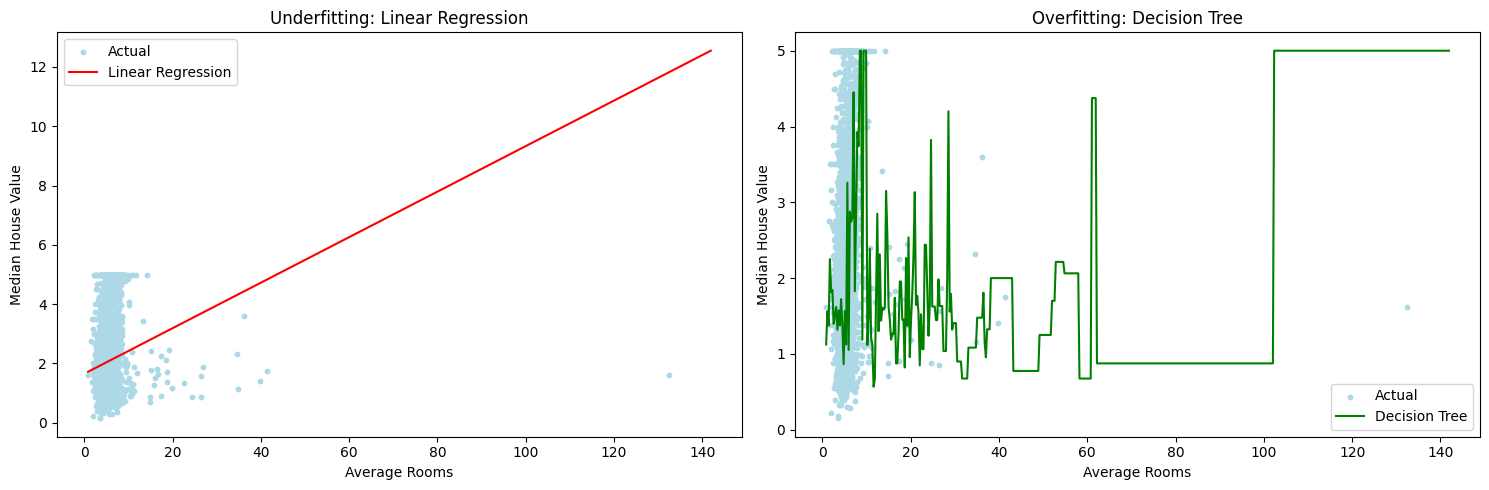

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Use only one feature for visualization (e.g., average number of rooms)
feature_index = feature_names.index("AveRooms")
X_single = X[:, feature_index].reshape(-1, 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# Train models
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Generate predictions for plotting
X_range = np.linspace(X_single.min(), X_single.max(), 500).reshape(-1, 1)
y_pred_linear = linear_model.predict(X_range)
y_pred_tree = tree_model.predict(X_range)

# Plotting
plt.figure(figsize=(15, 5))

# Linear Regression (Underfitting)
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color="lightblue", s=10, label="Actual")
plt.plot(X_range, y_pred_linear, color="red", label="Linear Regression")
plt.title("Underfitting: Linear Regression")
plt.xlabel("Average Rooms")
plt.ylabel("Median House Value")
plt.legend()

# Decision Tree Regression (Overfitting)
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color="lightblue", s=10, label="Actual")
plt.plot(X_range, y_pred_tree, color="green", label="Decision Tree")
plt.title("Overfitting: Decision Tree")
plt.xlabel("Average Rooms")
plt.ylabel("Median House Value")
plt.legend()

plt.tight_layout()
plt.show()


A simple linear regression model assumes a linear relationship between the features and the target variable. Given the complexity of the California Housing dataset, this model may fail to capture intricate patterns, leading to underfitting.

Symptoms:
- High training and test errors.
- Model is too simple to capture underlying data patterns.

A decision tree regressor can capture complex relationships in the data. However, without proper tuning, it may fit the training data too closely, including noise, leading to overfitting.

Symptoms:
- Low training error but high test error.
- Model is too complex, capturing noise and fluctuations in the training data.

In [2]:
print("📉 Linear Regression:")
print(f"  Train MSE: {root_mean_squared_error(y_train, linear_model.predict(X_train)):.4f}")
print(f"  Test MSE : {root_mean_squared_error(y_test, linear_model.predict(X_test)):.4f}")

print("\n🌳 Decision Tree Regressor:")
print(f"  Train MSE: {root_mean_squared_error(y_train, tree_model.predict(X_train)):.4f}")
print(f"  Test MSE : {root_mean_squared_error(y_test, tree_model.predict(X_test)):.4f}")

📉 Linear Regression:
  Train MSE: 1.1416
  Test MSE : 1.1368

🌳 Decision Tree Regressor:
  Train MSE: 0.2276
  Test MSE : 1.4930
